# What is EDA?

Exploratory Data Analysis, or EDA for short, is the phase in a Data Science project where we take the dataset and explore its variables, trying to learn as much as possible what influences the most the target variable.

In this phase, the data scientist wants to understand the data, how it is distributed, if there are errors or incomplete data, extract the first insights of the data, and visualize and learn how each explanatory variable affects the target variable.

# Using Decision Trees in the Process
Due to the power of a DT to capture the smallest variances in the data, using it helps to understand the relationships between the variables. As we are just exploring the data here, we don’t have to be very careful with data split or algorithm fine-tuning. We just have to run a DT to get the best insights.

Let’s see how to do that.

# Load Data and Import Libraries

In [1]:
# Importing libraries
import pandas as pd
import seaborn as sns
sns.set_style()
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.tree import plot_tree

# Loading a dataset
try:
    from ucimlrepo import fetch_ucirepo
except:
    !pip install ucimlrepo
finally:
    from ucimlrepo import fetch_ucirepo
    

In [2]:
# fetch dataset
student_performance = fetch_ucirepo(id=320)

In [3]:
# data (as pandas dataframes)
X = student_performance.data.features
y = student_performance.data.targets

In [4]:
# Gather X and Y for visualizations
df = pd.concat([X,y], axis=1)

In [5]:
df.head(3)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12


**We intend to determine which variables from this data have more influence over the final grade G3.**

# Exploring with a Regression DT
Now let’s build a DT to check what is the influence of the failures, absences and studytime over G3.

In [6]:
# Columns to explore
cols = ['failures', 'absences', 'studytime']

In [7]:
# Split X & Y
X = df[cols]
y = df.G3

In [8]:
# Fit Decision Tree
dt = DecisionTreeRegressor().fit(X,y)

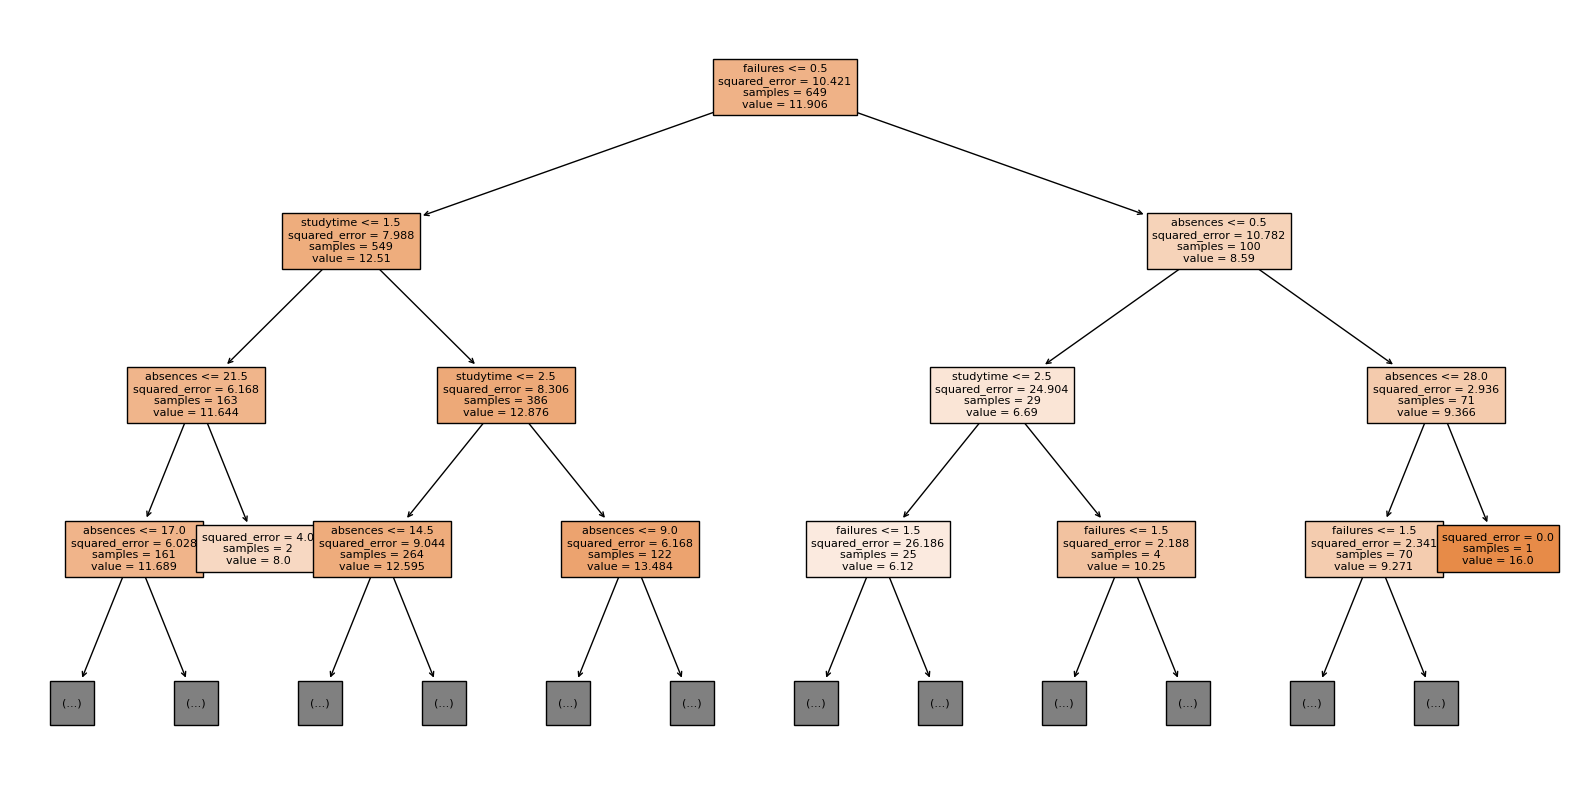

In [9]:
# Plot DT
plt.figure(figsize=(20,10))
plot_tree(dt, filled=True, feature_names=X.columns, max_depth=3, fontsize=8);

**Now we have a good visualization to understand the relationship of those variables we listed. Here are the insights we can get from this tree:**
* We know that the left means “Yes” and right means “No” to the condition of the first line inside of each box.
* Students with less failures (< 0.5, or zero, we should say), have higher grades. Just observe that the value of each box on the left is higher than those on the right.
* From the students with no failures, those with studytime > 2.5 get higher grades. The value is almost one point higher.
* Students with no failures, studytime < 1.5, and less than 22 absenses have higher final grades than those with a small amount of study time and higher absences.

# Free Time and Go Out
If we want to explore which students have higher grades based on the amount of free time and how frequently they go out, here’s the code.

In [10]:
# Columns to explore
cols = ['freetime', 'goout']

In [11]:
# Split X & Y
X = df[cols]
y = df.G3

In [12]:
# Fit Decision Tree
dt = DecisionTreeRegressor().fit(X,y)

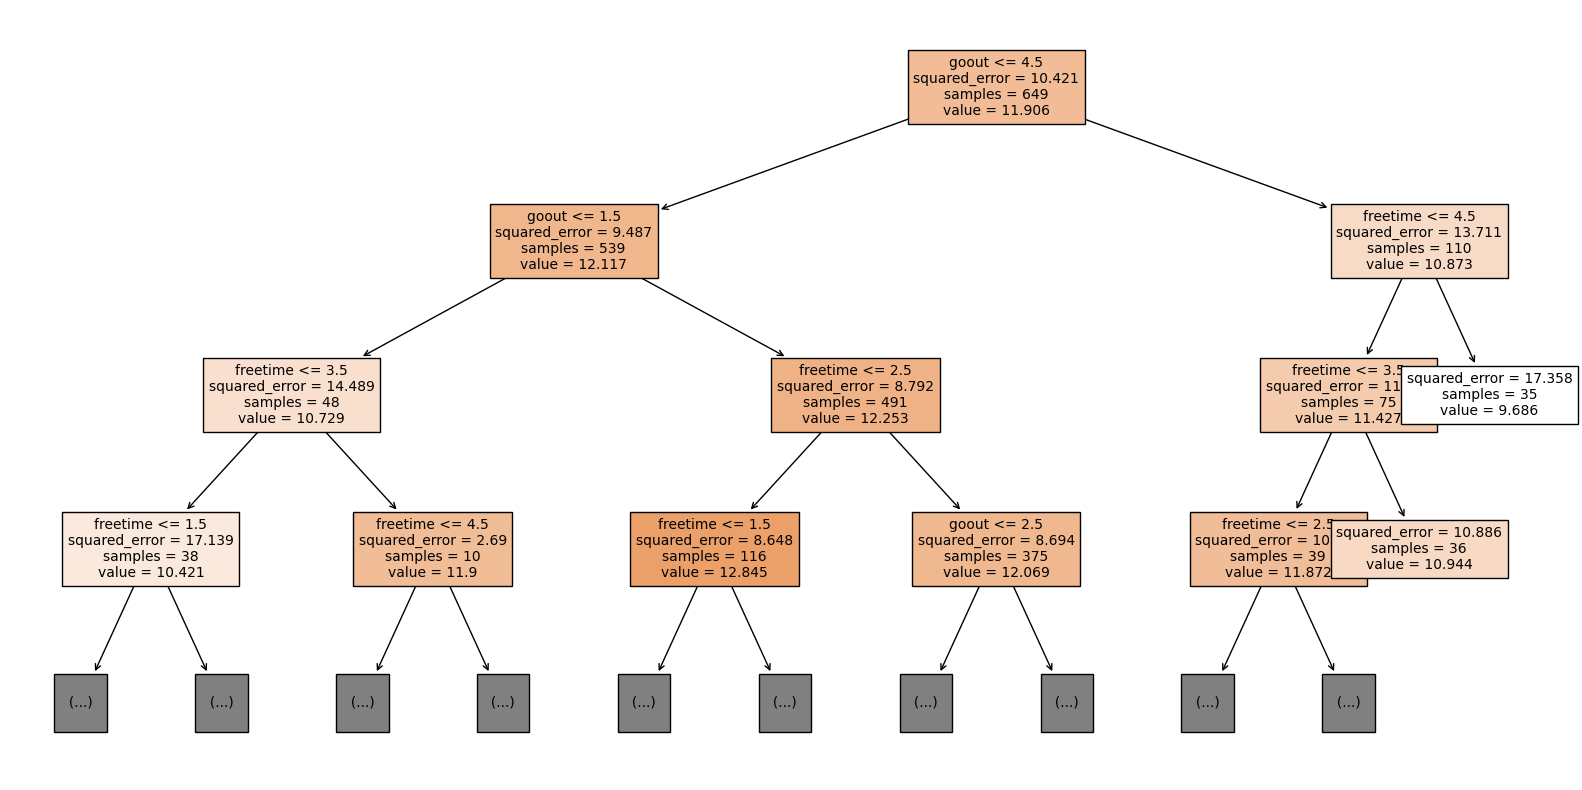

In [13]:
# Plot DT
plt.figure(figsize=(20,10))
plot_tree(dt, filled=True, feature_names=X.columns, max_depth=3, fontsize=10);

* **The variables goout and freetime are scaled from 1= Very Low to 5 = Very High. Notice that those who don’t go out frequently (< 1.5) and don’t have free time (<1.5) have as low grades as those who go out a lot (>4.5) and with a fair amount of free time. The best grades are from the people balanced between going out > 1.5 and free time in the 1.5 to 2.5 range.**

# Exploring with a Classification DT
The same exercise can be done with a Classification Tree algorithm. The logic and coding are the same, but now the resulting value shown is the class predicted, instead of a value. Let’s see a simple example using another dataset, Taxis from the Seaborn package (BSD License), that brings a set of Taxi runs in New York city.

If we want to explore the relationship between the total amount of the run and the payment method, here’s the code.

In [14]:
# Load the dataset
df = sns.load_dataset('taxis').dropna()

In [15]:
# Columns to explore
cols = ['total']

In [16]:
# Split X & Y
X = df[cols]
y = df['payment']


In [17]:
# Fit Decision Tree
dt = DecisionTreeClassifier().fit(X,y)

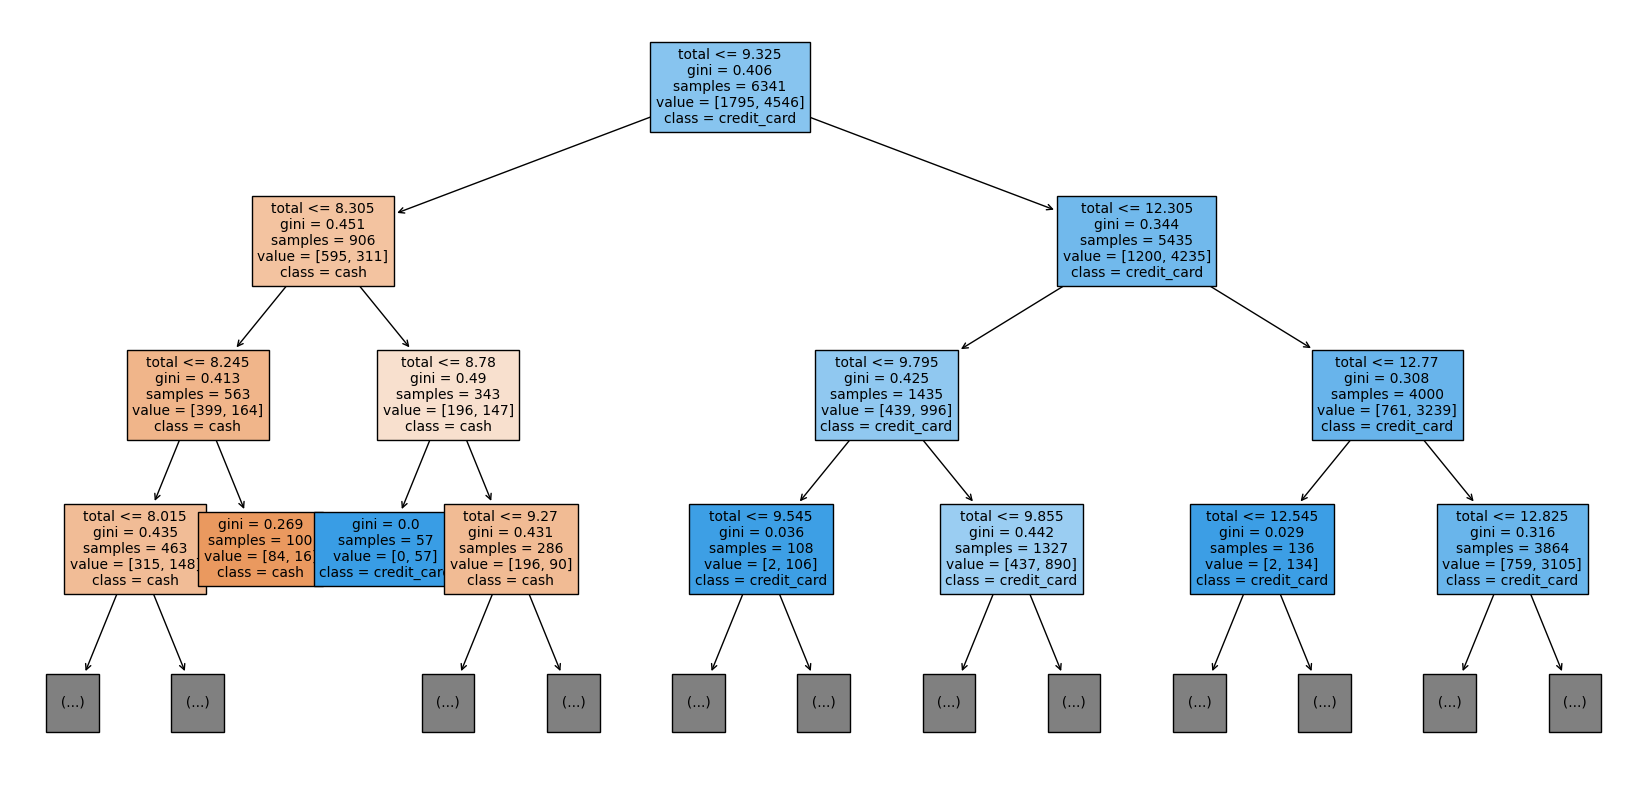

In [18]:
#Plot Tree
plt.figure(figsize=(21,10))
plot_tree(dt, filled=True, feature_names=X.columns, max_depth=3, 
          fontsize=10, class_names=['cash', 'credit_card']);

* **Just eyeballing the resulting tree, we can see that the lower total amounts are much more likely to be paid in cash. Totals under $9.32 are in general paid in cash.**

# Before You Go
In this tutorial, we learned a quick way to use Decision Trees to explore the relationship between variables in our dataset.

This algorithm can quickly capture patterns that are not easily found at first. We can use the power of decision trees to find those cuts of the data, enabling us to extract great insights from it.

And a quick note about the code: in the plot_tree() function, you can set how many levels you want using the max_depth feature. You can also set up that hyperparameter in the DT instance from sklearn. It’s up to you. The advantage of using it on the plot_tree is that you can quickly test many different depths without the need to re-train the model.

# References
[https://medium.com/towards-data-science/](http://)

[https://en.wikipedia.org/wiki/Decision_tree?source=post_page-----1d03558930d3--------------------------------](http://)

[https://archive.ics.uci.edu/dataset/320/student+performance?source=post_page-----1d03558930d3--------------------------------](http://)

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html?source=post_page-----1d03558930d3--------------------------------